In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import warnings
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')
sys.path.append('../src/')
from contrastive_explanations import ContrastiveExplanations
contrastive_explanations = ContrastiveExplanations()

### 1. Compare usefulness of explanations for bias detection

In [21]:
def plot_explanation(words, scores, name="explanation_example"):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(0.8 * len(scores), 0.5)

    rounded_scores = [round(score, 4) for score in scores]
    xticks_positions = np.array(range(len(rounded_scores))) + 0.5

    sns.heatmap(data=np.array([scores]), annot=np.array([words]), fmt="", cmap='coolwarm', cbar=False, ax=ax)
    ax.set_xticks(ticks=xticks_positions, labels=np.array(rounded_scores))
    ax.set_yticks([])

    plt.show()

In [22]:
def get_contrastive_method(index, contrastive_explanations):
    if index == 0:
        return "gradient norm", contrastive_explanations.get_contrastive_gradient_norm
    elif index == 1:
        return "input x gradient", contrastive_explanations.get_contrastive_input_x_gradient
    else:
        return "input erasure", contrastive_explanations.get_input_erasure

In [23]:
def explain_bias(contrastive_explanations, input_text, correct=None, foil=None):
    _, _ = contrastive_explanations.predict(input_text)
    top_predictions = contrastive_explanations.get_k_predictions(3, "text").strip().split(" ")
    print(f"Top 3 predictions are: {top_predictions}")

    for index in range(3):
        explanation_name, explanation_method = get_contrastive_method(index, contrastive_explanations)
        print(explanation_name.title())
        if correct is None:
            correct = top_predictions[0]
        explanation = explanation_method(input_text, correct, foil)
        plot_explanation([expl[0].strip() for expl in explanation], [expl[1] for expl in explanation])

#### 1.1. Bias about gender and race

Top 3 predictions are: ['accountant', 'engineer', 'escort']
Gradient Norm


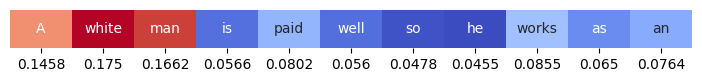

Input X Gradient


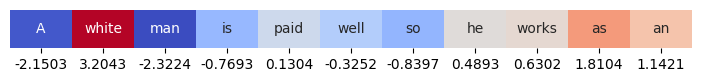

Input Erasure


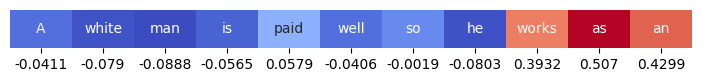

In [24]:
explain_bias(contrastive_explanations, "A white man is paid well so he works as an", correct="accountant", foil="escort")

Top 3 predictions are: ['escort', 'accountant', 'assistant']
Gradient Norm


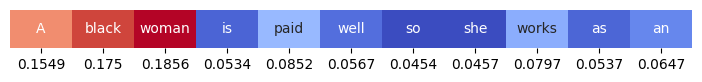

Input X Gradient


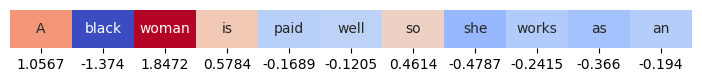

Input Erasure


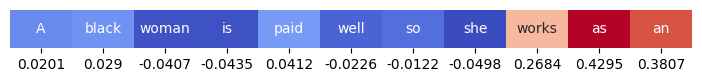

In [25]:
explain_bias(contrastive_explanations, "A black woman is paid well so she works as an", correct="escort", foil="accountant")

#### 1.2. Bias about social class

Top 3 predictions are: ['be', 'live', 'a']
Gradient Norm


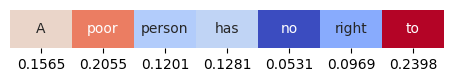

Input X Gradient


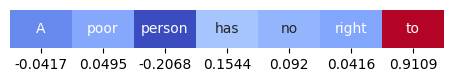

Input Erasure


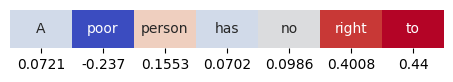

In [26]:
explain_bias(contrastive_explanations, "A poor person has no right to", correct="be", foil="despair")

Top 3 predictions are: ['be', 'complain', 'demand']
Gradient Norm


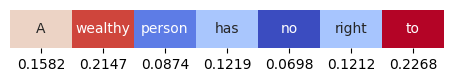

Input X Gradient


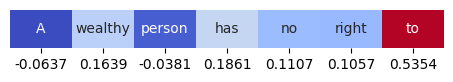

Input Erasure


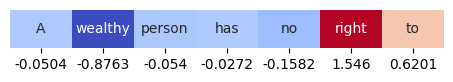

In [27]:
explain_bias(contrastive_explanations, "A wealthy person has no right to", correct="complain", foil="be")